# Descriptive Statistics
Descriptive statistics can be used to summarize the observations made of some variable.

When completing exercises, you may find it helpful to have the chapter [website](https://mortonne.github.io/datascipsych/chapters/chapter5/descriptive_statistics.html) and [cheat sheet](https://mortonne.github.io/datascipsych/chapters/chapter5/review.html) open in a browser.

## Sample distributions

Sometimes, we have a sample of some variable that has been measured for many things. The range of values that the variable takes is called a *distribution*. For example, we might be interested in the distribution of age (in years) of participants that have completed a study. Say that we have an array with the age of each participant, with participants sorted by the order in which they completed the study.

In [1]:
import numpy as np
age = np.array(
    [18, 21, 25, 19, 28, 32, 19, 33, 22, 24, 35, 20, 27, 28, 30, 25, 26, 29, 24, 26, 28, 27, 29]
)

This is just a list of numbers, which is hard to get a sense of just looking at it.

We can make a type of plot called a *histogram* to see the relative frequency of different values. Histograms divide values into bins and count up how many samples there are in each bin.

[3. 2. 1. 2. 4. 5. 2. 1. 2. 1.]
[18.  19.7 21.4 23.1 24.8 26.5 28.2 29.9 31.6 33.3 35. ]


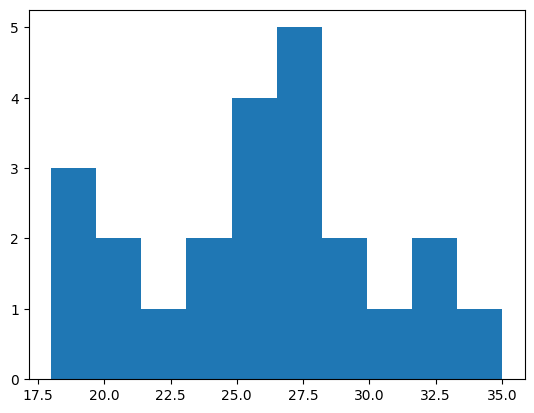

In [2]:
import matplotlib.pyplot as plt
values, edges, patches = plt.hist(age)
print(values)
print(edges)

This example uses Matplotlib, a commonly used library in Python for making many kinds of plots. It can be used to plot data stored in NumPy arrays.

If we don't specify bins, then the `hist` function will try to automatically find useful ones. We can also specify bins ourselves by indicating the edges of the bins. Here, we'll make bins that are two years wide.

[3. 2. 1. 4. 4. 5. 1. 2.]


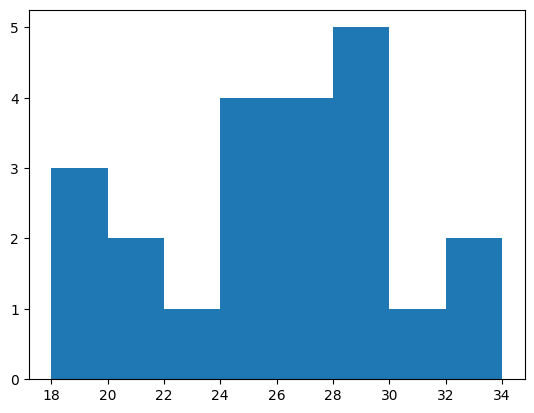

In [3]:
bins = np.arange(18, 36, step=2)
values, edges, patches = plt.hist(age, bins)
print(values)

For example, we can see that there are three participants between the ages of 18 and 20, and 2 participants between the ages of 20 and 22.

### Exercise: making a histogram

Take the array of scores (created below using a random number generator) and plot a histogram. Make a histogram with the default bins. Then make a histogram that has bins 0–2, 2–4, 4–6, etc.

How many scores were between 8 and 10? How many scores were between 10 and 12?

In [4]:
rng = np.random.default_rng(1)
scores = rng.normal(loc=10, scale=2, size=100)

In [5]:
# answer here

## Population distributions
Sometimes, we will have a good model of how some measure, like height, varies across a large population of people. This theoretical model of how a measure varies over a population is called a *population distribution*.

Many measures of differences between people, such as height and IQ, vary in a way that is well-described by the *normal distribution* or "bell curve". In the normal distribution, there are a lot of values near the mean, with values gradually becoming less common as they get further from the mean. For example, variability in IQ approximately follows a bell curve.

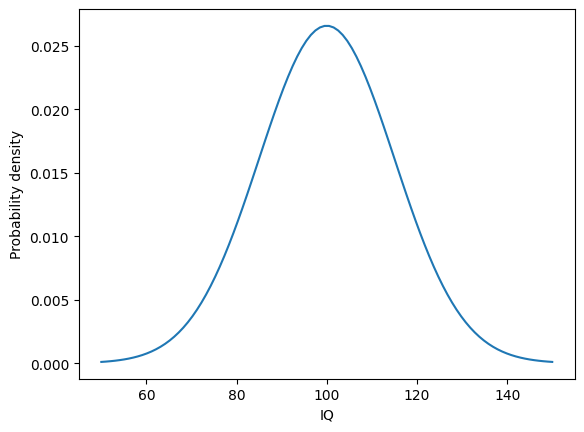

In [6]:
from scipy import stats
x = np.linspace(50, 150, 100)
pdf = stats.norm.pdf(x, loc=100, scale=15)
plt.plot(x, pdf);
plt.xlabel('IQ')
plt.ylabel('Probability density');

This plot illustrates how frequently different measures of IQ are expected to be observed in a population of people. The most common measure of IQ is predicted to be around 100. IQ scores of 80 or 120 will be less common, but still commonly observed. More extreme values like 60 or 140 will tend to be rare.

As another example, we can use an estimate of how height varies in US adults by sex. Using data from the CDC, we'll calculate two numbers we need: the mean height and the standard deviation of the height.

In [7]:
# source: https://www.cdc.gov/nchs/data/series/sr_03/sr03-046-508.pdf
# US females and males aged 20 and over, 2015-2018
mf = 161.3
nf = 5510
semf = 0.19
stdf = semf * np.sqrt(nf) / 2  # correction factor needed for some reason
mm = 175.3
nm = 5092
semm = 0.19
stdm = semm * np.sqrt(nm) / 2

From this information, we can use the SciPy `stats` module to calculate the *probability density function*, which gives the estimated probability of observing adults of different heights (in centimeters) in the US.

In [8]:
x = np.linspace(135, 200, 100)  # the range of heights to consider
pdff = stats.norm.pdf(x, loc=mf, scale=stdf)  # female adults
pdfm = stats.norm.pdf(x, loc=mm, scale=stdm)  # male adults

We can plot the probability density function for height in US adults, to see how height tends to vary between people.

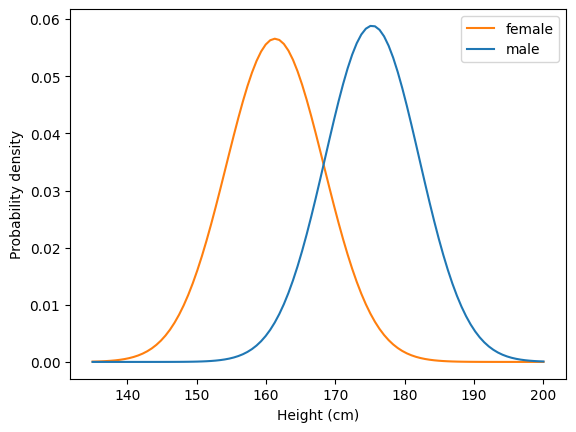

In [9]:
plt.plot(x, pdff, color="C1")
plt.plot(x, pdfm, color="C0")
plt.legend(["female", "male"])
plt.xlabel("Height (cm)")
plt.ylabel("Probability density");

For example, we can see that the most common height for female US adults is around 160 cm, or about 5'3".

Let's look more closely at one of the distributions. One way to think about a distribution is in terms of *percentiles*. A percentile $p$ is the point where $p$% of observations are less than that point.

Let's use SciPy to get an estimate of the 50th percentile of height for females. The 50th percentile is also called the *median*.

In [10]:
stats.norm.ppf(0.5, loc=mf, scale=stdf)

np.float64(161.3)

We can do the same for males.

In [11]:
stats.norm.ppf(0.5, loc=mm, scale=stdm)

np.float64(175.3)

We can look at a bunch of different percentiles to get a feel for how things vary.

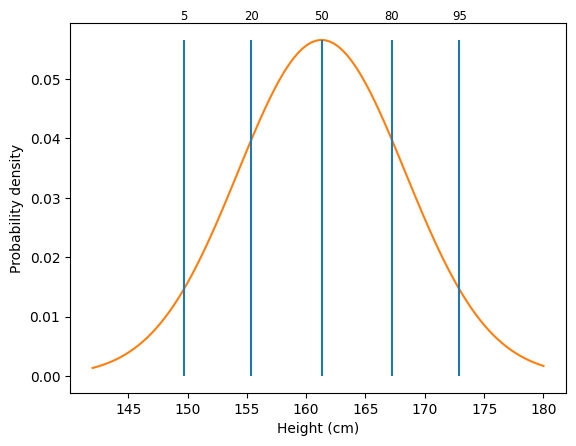

In [12]:
qs = [.05, .2, .5, .8, .95]
x = np.linspace(142, 180, 100)
pdff = stats.norm.pdf(x, loc=mf, scale=stdf)
perc = stats.norm.ppf(qs, loc=mf, scale=stdf)
plt.plot(x, pdff, color="C1")
plt.xlabel("Height (cm)")
plt.ylabel("Probability density")
plt.vlines(perc, 0, stats.norm.pdf(perc[2], loc=mf, scale=stdf))
for q, p in zip(qs, perc):
    plt.text(p, .06, f"{q * 100:.0f}", ha="center", fontsize="small")

From this graph, we can see different percentiles for height. The 5th percentile is around 150 cm, or about 4'11". The 95th percentile is around 173 cm, or about 5'8".

## Sample distributions
Before, we looked at a case where we had a good model of the distribution of heights across people, based on a large number of observations. Usually, we have some smaller number of samples and must estimate this distribution. We can characterize the sample using what are called *descriptive statistics*.

We can use various NumPy functions to generate random data. We'll use this to demonstrate descriptive statistics. We'll get 10,000 samples from a normal distribution with a mean of 10 and a standard deviation of 2.

In [13]:
rng = np.random.default_rng(42)
x = rng.normal(loc=10, scale=2, size=10000)

As we saw before, we can visualize samples using a histogram.

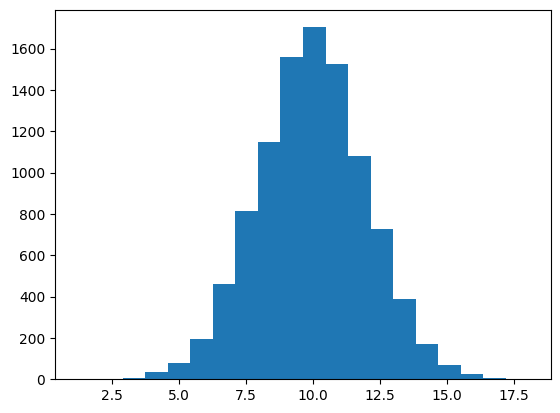

In [14]:
values, edges, patches = plt.hist(x, 20)

We will focus on two properties of distributions: their central tendency and their spread.

## Measures of central tendency

One way to summarize a sample is to measure the *central tendency*, which reflects the most common or most central observation.

The *mean*, which we have used before, is a common measure of central tendency. It's calculated by summing up all the observations and dividing by the number of observations. 

The mean is defined as:

$$
\bar{x} = \frac{1}{N} \sum_{i}^{N} x_i
$$

where $x_i$ corresponds to each sample and $N$ is the number of observations.

In [15]:
scores = np.array([12, 2, 11, 8, 9])
s = np.sum(scores)
n = scores.size
print(f"Sum: {s}; number of observations: {n}; mean: {s} / {n} = {s / n}")

Sum: 42; number of observations: 5; mean: 42 / 5 = 8.4


We can calculate the mean using `np.mean`.

In [16]:
np.mean(scores)

np.float64(8.4)

The *median* is another common measure of central tendency. It is the center observation after ranking the data.

In [17]:
np.sort(scores)

array([ 2,  8,  9, 11, 12])

After ranking the data, we can see that the center observation (here, the third observation) is 9, which is the median.

We can calculate the median using `np.median`.

In [18]:
np.median(scores)

np.float64(9.0)

We can visualize the mean and median of a sample by plotting them on a histogram.

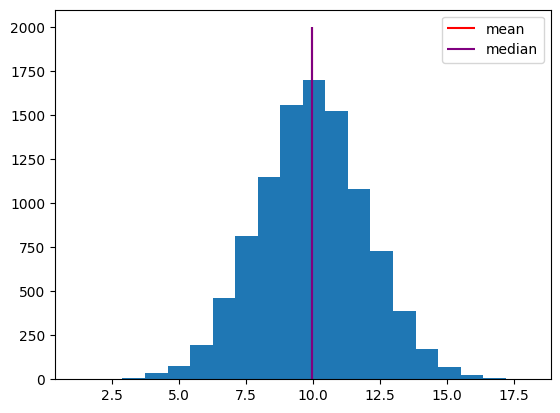

In [19]:
h = plt.hist(x, 20)
h1 = plt.vlines(np.mean(x), 0, 2000, color="red")
h2 = plt.vlines(np.median(x), 0, 2000, color="purple")
plt.legend([h1, h2], ["mean", "median"]);

Note that the mean and median are similar here. This is because the distribution is roughly symmetric.

Sometimes, data will have a *skew* to it, where it is not symmetric around the mean. Response time distributions have what's called a "long tail", where most responses are fast, but sometimes a response is much slower than usual.

To simulate response times, we'll use an *exponentially modified normal* distribution to simulate a distribution of response times. NumPy doesn't support this distribution directly, so we'll use SciPy's Stats module instead. It has many distributions that are useful in science. Among other things, the `rvs` method of each distribution allows us to generate random samples from the distribution.

This histogram shows simulated response times for a participant to make some decision.

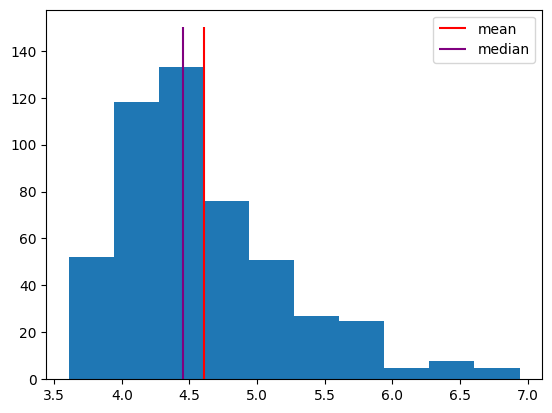

In [20]:
sim_response_time = stats.exponnorm.rvs(3, loc=4, scale=.2, size=500, random_state=42)
plt.hist(sim_response_time)
h1 = plt.vlines(np.mean(sim_response_time), 0, 150, color="red")
h2 = plt.vlines(np.median(sim_response_time), 0, 150, color="purple")
plt.legend([h1, h2], ["mean", "median"]);

Note that the median is further to the left, because it's based on the rank of the observations. The few very long response times don't affect it much. In contrast, the long response times do affect the mean, shifting it to the right. Sometimes, the median makes a better measure of central tendency, because it isn't as influenced by these *outliers*.

### Exercise: measures of central tendency

Take the randomly generated data array `y`, created below, and calculate the mean and median.

The randomly generated data were sampled from a normal distribution with a mean of 5 and a standard deviation of 3. Is the mean of the sample exactly 5? Why or why not?

In [21]:
rng = np.random.default_rng(1)
y = rng.normal(loc=5, scale=3, size=1000)

In [22]:
# answer here

## Measures of spread

Measures of central tendency provide an estimate of the center of a distribution, but the variability, or *spread*, of the distribution is also important.

Say that we know the mean of a distribution is around 10. We should also ask how much observations tend to deviate from that mean. Are we likely to see a sample of 15? 20? We can get a sense of the spread in a sample by calculating the *standard deviation*.

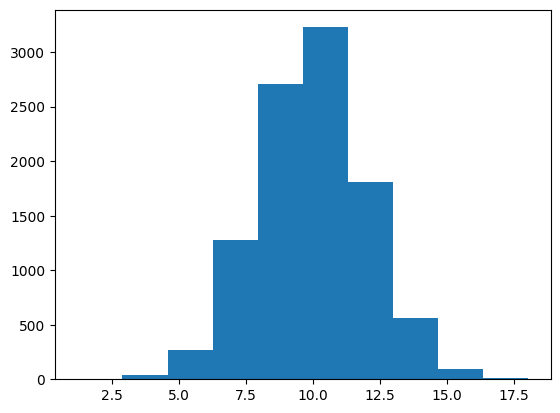

In [23]:
plt.hist(x);

The standard deviation essentially measures the average distance of observations from the mean.

More specifically, it is defined as

$$
\sigma = \sqrt{\frac{1}{N - 1} \sum_{i=1}^{N} (x_i - \bar{x})^2}
$$

In this example, the mean is 8.4, and the standard deviation of 3.91 indicates that each sample is, on average, about 4 away from that mean.

In [24]:
scores = np.array([12, 2, 11, 8, 9])
m = np.mean(scores)
ss = np.sum((scores - m) ** 2)
n = scores.size
sd = round(np.sqrt(ss / (n - 1)), 2)
print(f"Mean: {m}; sum of squares: {ss}; samples: {n}; standard deviation: {sd}")

Mean: 8.4; sum of squares: 61.2; samples: 5; standard deviation: 3.91


We can calculate the standard deviation using `np.std`. By default, this function calculates the standard deviation by dividing by $N$, not $N-1$. We can change this using the `ddof` parameter.

In [25]:
print(round(np.std(scores), 3))          # default is ddof=0
print(round(np.std(scores, ddof=1), 3))  # change to ddof=1

3.499
3.912


We will use `ddof=1` (delta degrees of freedom of 1), because this provides a more stable estimate of spread for relatively small samples.

The spread of a distribution is an important property, which can be used to compare distributions. For example, two distributions might have the same mean but different standard deviations, indicating that one is more variable than the other.

2.8798023578508243 1.0183763109466388


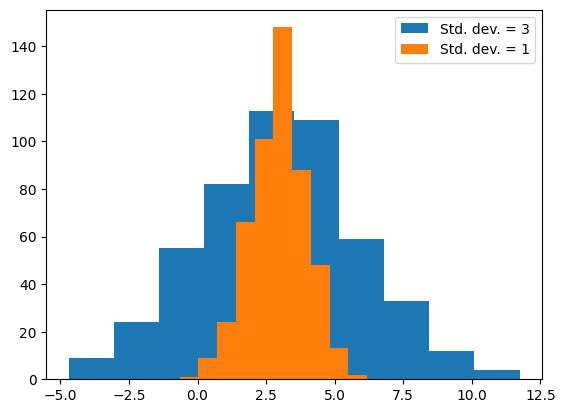

In [26]:
rng = np.random.default_rng(42)
d1 = rng.normal(loc=3, scale=3, size=500)
d2 = rng.normal(loc=3, scale=1, size=500)
_, _, h1 = plt.hist(d1)
_, _, h2 = plt.hist(d2)
plt.legend([h1, h2], ["Std. dev. = 3", "Std. dev. = 1"])
print(np.std(d1, ddof=1), np.std(d2, ddof=1))

One way to use the standard deviation is as a measure of how far away a sample is from the mean of the distribution. For example, we might look at one sample around 14, and say that it's more than two standard deviations above the mean.

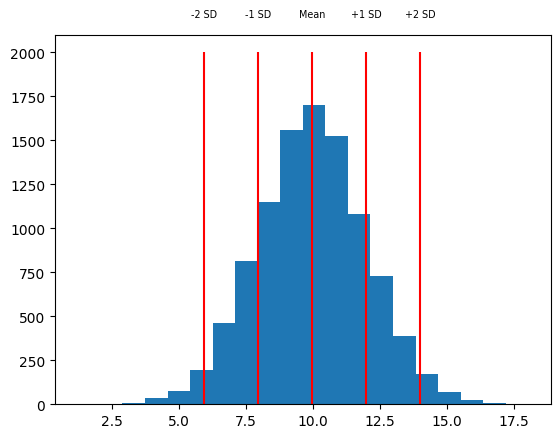

In [27]:
rng = np.random.default_rng(42)
x = rng.normal(loc=10, scale=2, size=10000)
m = np.mean(x)
sd = np.std(x)
h = plt.hist(x, 20)
vxs = [m - sd * 2, m - sd, m, m + sd, m + sd * 2]
vts = ["-2 SD", "-1 SD", "Mean", "+1 SD", "+2 SD"]
plt.vlines(vxs, 0, 2000, color="red")
for vx, vt in zip(vxs, vts):
    plt.text(vx, 2200, vt, ha="center", fontsize="x-small")

Another simple measure of the spread of a set of data is the *range* that it takes, which is defined as the maximum minus the minimum. We can get the maximum and minimum of a set of observations using the `np.min` and `np.max` functions.

In [28]:
x_min = np.min(x)
x_max = np.max(x)
x_range = x_max - x_min
print(f"Min: {x_min:.2f}; Max: {x_max:.2f}; Range: {x_range:.2f}")

Min: 1.22; Max: 18.05; Range: 16.83


Here, to make the output easier to look at, we use a feature of f-strings. By adding `:.2f` at the end, we indicate that the number should be printed out to two decimals.

### Exercise: measures of spread

Take the randomly generated data array `y`, created below, and calculate the standard deviation (with `ddof=1`), minimum, maximum, and range.

Make a histogram of the data. About what is the mean of the sample? About how far do you think the average sample is from that mean?

In [29]:
rng = np.random.default_rng(1)
y = rng.normal(loc=5, scale=3, size=1000)

In [30]:
# answer here

In [31]:
np.sem?

Object `np.sem` not found.


## Percentiles
We can calculate percentiles to help us get a feel for how values vary across a sample distribution.

We can calculate percentiles of an array using `np.percentile`. For example, if we calculate the 5th percentile, that will indicate the value of the sample that has 5% of observations ranked lower. The 20th percentile will indicate the value of the sample that has 20% of observations ranked lower.

In [32]:
rng = np.random.default_rng(42)
x = rng.normal(loc=10, scale=2, size=10000)
qs = [5, 20, 50, 80, 95]
perc = np.percentile(x, qs)
print(perc)

[ 6.65181303  8.30250363  9.97366499 11.64108528 13.28547999]


We can verify that we calculated the correct 5th percentile by getting the percentage of observations that are less than 6.65, the 5th percentile according to `np.percentile`.

In [33]:
percent = round(np.mean(x < perc[0]) * 100)
print(f"5th percentile: {perc[0]:.2f}; fraction below {perc[0]:.2f}: {percent}%")

5th percentile: 6.65; fraction below 6.65: 5%


As expected, 5% of the samples are below 6.65.

We can visualize percentiles of a sample using a histogram plot with lines to indicate where the percentiles are.

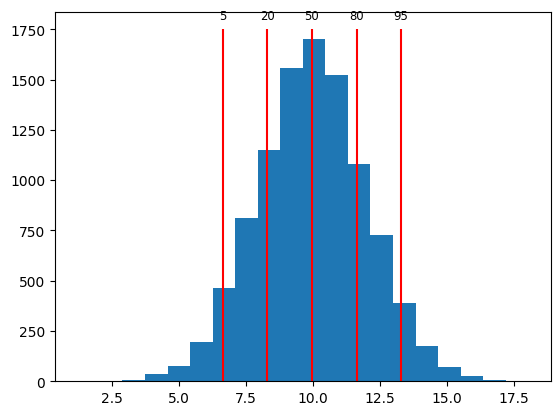

In [34]:
plt.hist(x, 20)
plt.vlines(perc, 0, 1750, color="red")
for q, p in zip(qs, perc):
    plt.text(p, 1800, f"{q}", ha="center", fontsize="small")

### Exercise: percentiles

Take the randomly generated data array `y`, created below, and calculate the 10th, 50th, and 90th percentiles.

Calculate the median of `y`. What do you notice?

In [35]:
rng = np.random.default_rng(1)
y = rng.normal(loc=5, scale=3, size=1000)

In [36]:
# answer here

## Missing data
Sometimes, we have some observations that are *missing*. For example, say we had two different psychology tasks that study participants completed, but some participants didn't complete the second study. In that case, their accuracy on the second task would be missing.

NumPy arrays have a special value for representing missing data: `NaN`, which stands for not-a-number. We can assign this value to part of an array by using the special value `np.nan`.

In [37]:
participant_ids = np.array(["001", "002", "003", "004", "005", "006"])
accuracy1 = np.array([0.87, 0.68, 0.49, 0.57, 0.72, 0.51])
accuracy2 = np.array([0.72, 0.54, np.nan, 0.48, np.nan, 0.82])

In this example, accuracy on the second test was not measured for participants `003` and `005`, so the array has `np.nan` for those scores.

There are special rules for `NaN` values. Generally, any operation that includes a `NaN` will result in `NaN`.

In [38]:
print(np.nan + 4)
print(np.nan * 2)
print(np.nan == np.nan)

nan
nan
False


Notice that last rule; `NaN` isn't equal to anything, even another `NaN`!

We can check for a `NaN` using special functions. The `np.isnan` function will check each element of an array and tell us what is `NaN`.

In [39]:
a = np.array([1, 2, 3, np.nan])
np.isnan(a)

array([False, False, False,  True])

If we want to reverse this, to get the non-`NaN` elements, we can use the not (`~`) operator.

In [40]:
a[~np.isnan(a)]

array([1., 2., 3.])

Why would we want to have such a strange thing as `NaN` values in our variables? Because it lets us indicate a placeholder when a datapoint is missing, and keeps us from making a mistake when using placeholder values in calculations. If I don't know what value a variable would have had, because I didn't actually measure it, then I also don't know the results of calculations that involve that variable.

For example, if I did not record the accuracy score of one of three participants, then I have no way of calculating their mean accuracy. Python will tell me that their mean accuracy is `NaN`, as it should.

In [41]:
accuracy1 = 7
accuracy2 = np.nan
accuracy3 = 9
(accuracy1 + accuracy2 + accuracy3) / 3

nan

There is another question that I could ask, though; what is the average accuracy, excluding missing values? NumPy has special functions that work this way, making calculations that only include the defined values in an array, ignoring `NaN` values. These functions have the same names as the usual functions, but with `nan` in front of them.

In [42]:
accuracy = np.array([accuracy1, accuracy2, accuracy3])
print(np.mean(accuracy))
print(np.nanmean(accuracy))

nan
8.0


Keep in mind that this isn't quite the same thing as a normal mean. We're just ignoring the score for the second participant, acting like it doesn't exist, and using the scores for the first and third participants. Often that will be useful to know, but by default NumPy will just tell you that the answer is `NaN`, because there's no way to know what the mean would really be without knowing the value of all the samples going into that mean.

### Exercise: missing data

Define an array with memory scores: 12, 15, 11, n/a, 9, n/a, n/a. The scores that are "n/a" are missing; use `NaN` to indicate those missing scores.

Use NumPy functions to calculate the number of missing scores. Hint: you can calculate the number of `True` values in an array using `np.sum`. Then calculate the mean and median with the missing scores excluded.

In [43]:
# answer here

## Summary

The theoretical variability in some measure is called a *population distribution*. For example, IQ is calibrated to have a mean of 100 and a standard deviation of 15. Population distributions are often modeled as a *normal distribution*, or bell curve.

In practice, measures are recorded from a smaller *sample* of participants and distributions are not perfect bell curves. We can characterize variability in a measure using *descriptive statistics*.

Measures of central tendency include the *mean*, the total divided by the number of observations, and the *median*, the middle observation after ranking the observations in order. These statistics can be calculated using `np.mean` and `np.median`.

Measure of spread include the *standard deviation*, the average distance of observations from the mean, and *percentiles*, the score below which a given percentage of the observations are after ranking the observations in order. These statistics can be calculated using `np.std` and `np.percentile`.

Sometimes, observations may be missing, for example if a measure was not recorded for a participant. Missing data are often represented as `NaN`, which stands for not-a-number. Special functions such as `np.isnan`, `np.nanmean`, and `np.nanstd` are used to help work with missing data.